#### 3.4.2 Non-Negative Matrix Factorization (NMF)
![Alt text](http://cfile24.uf.tistory.com/image/990F9B405A3923AF21FB8F)
- NMF
  - 0 또는 양수의 주성분과 계수값만을 생성
  - 주성분과 계수의 가중치 합은 음수가 아니므로 원 데이터의 특성에 음수가 없어야 함.
- NMF 활용 데이터
  - 음성/악기 오디오 데이터
  - 여러 악기 또는 음성이 섞여 있는 데이터에서 각 원본 성분들을 구분할 수 있음
- PCA vs. NMF
  - PCA
    - 음수 성분이나 계수가 만드는 효과의 이해가 어려움. 
    - 실제로 부호에는 아무런 규칙이 없음
  - NMF
    - 상대적으로 PCA보다 해석하기 쉬움.
    - 모든 주성분 사이에 원본 데이터의 특질을 더 많이 포함하는 중요도 차이가 없음 --> 즉 모든 주성분은 동등하게 중요
    - 무작위 초기화 --> 난수 생성 초기값에 따라 결과가 달라짐

##### Applying NMF to synthetic data
- 원본 데이터 확인
  - 원본 데이터의 각 성분이 양수인지 확인하는 작업 필요
  - 각 데이터가 원점 (0,0)에서 상대적으로 어디에 놓여 있는가가 중요.
  - 즉, 원점 (0,0)에서 데이터가 가는 방향을 추출한 것으로 음수미포함 성분을 이해 가능<br/><br/>  

- NMF 알고리즘
  - $X$: 원본 입력 데이터
  - $W$: 변환 행렬
  - $H$: 주성분
  - the approximation of $X$ by $X \simeq WH$ is achieved by minimizing the error function $$\min_{W,H}|| X-WH ||_{F},~subject~to~W\geq 0, H\geq 0$$.
  - 다음과 같은 L2 노름, Frobenius Norm의 제곱인 $$\frac{1}{2} \sum_{i,j}(X_{ij}-WH_{ij})^2$$을 목적함수로 하여 '좌표 하강법'으로 최소화함

In [1]:
%matplotlib inline
import sys 
sys.path.append('..')
from preamble import *
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
cancer = load_breast_cancer()

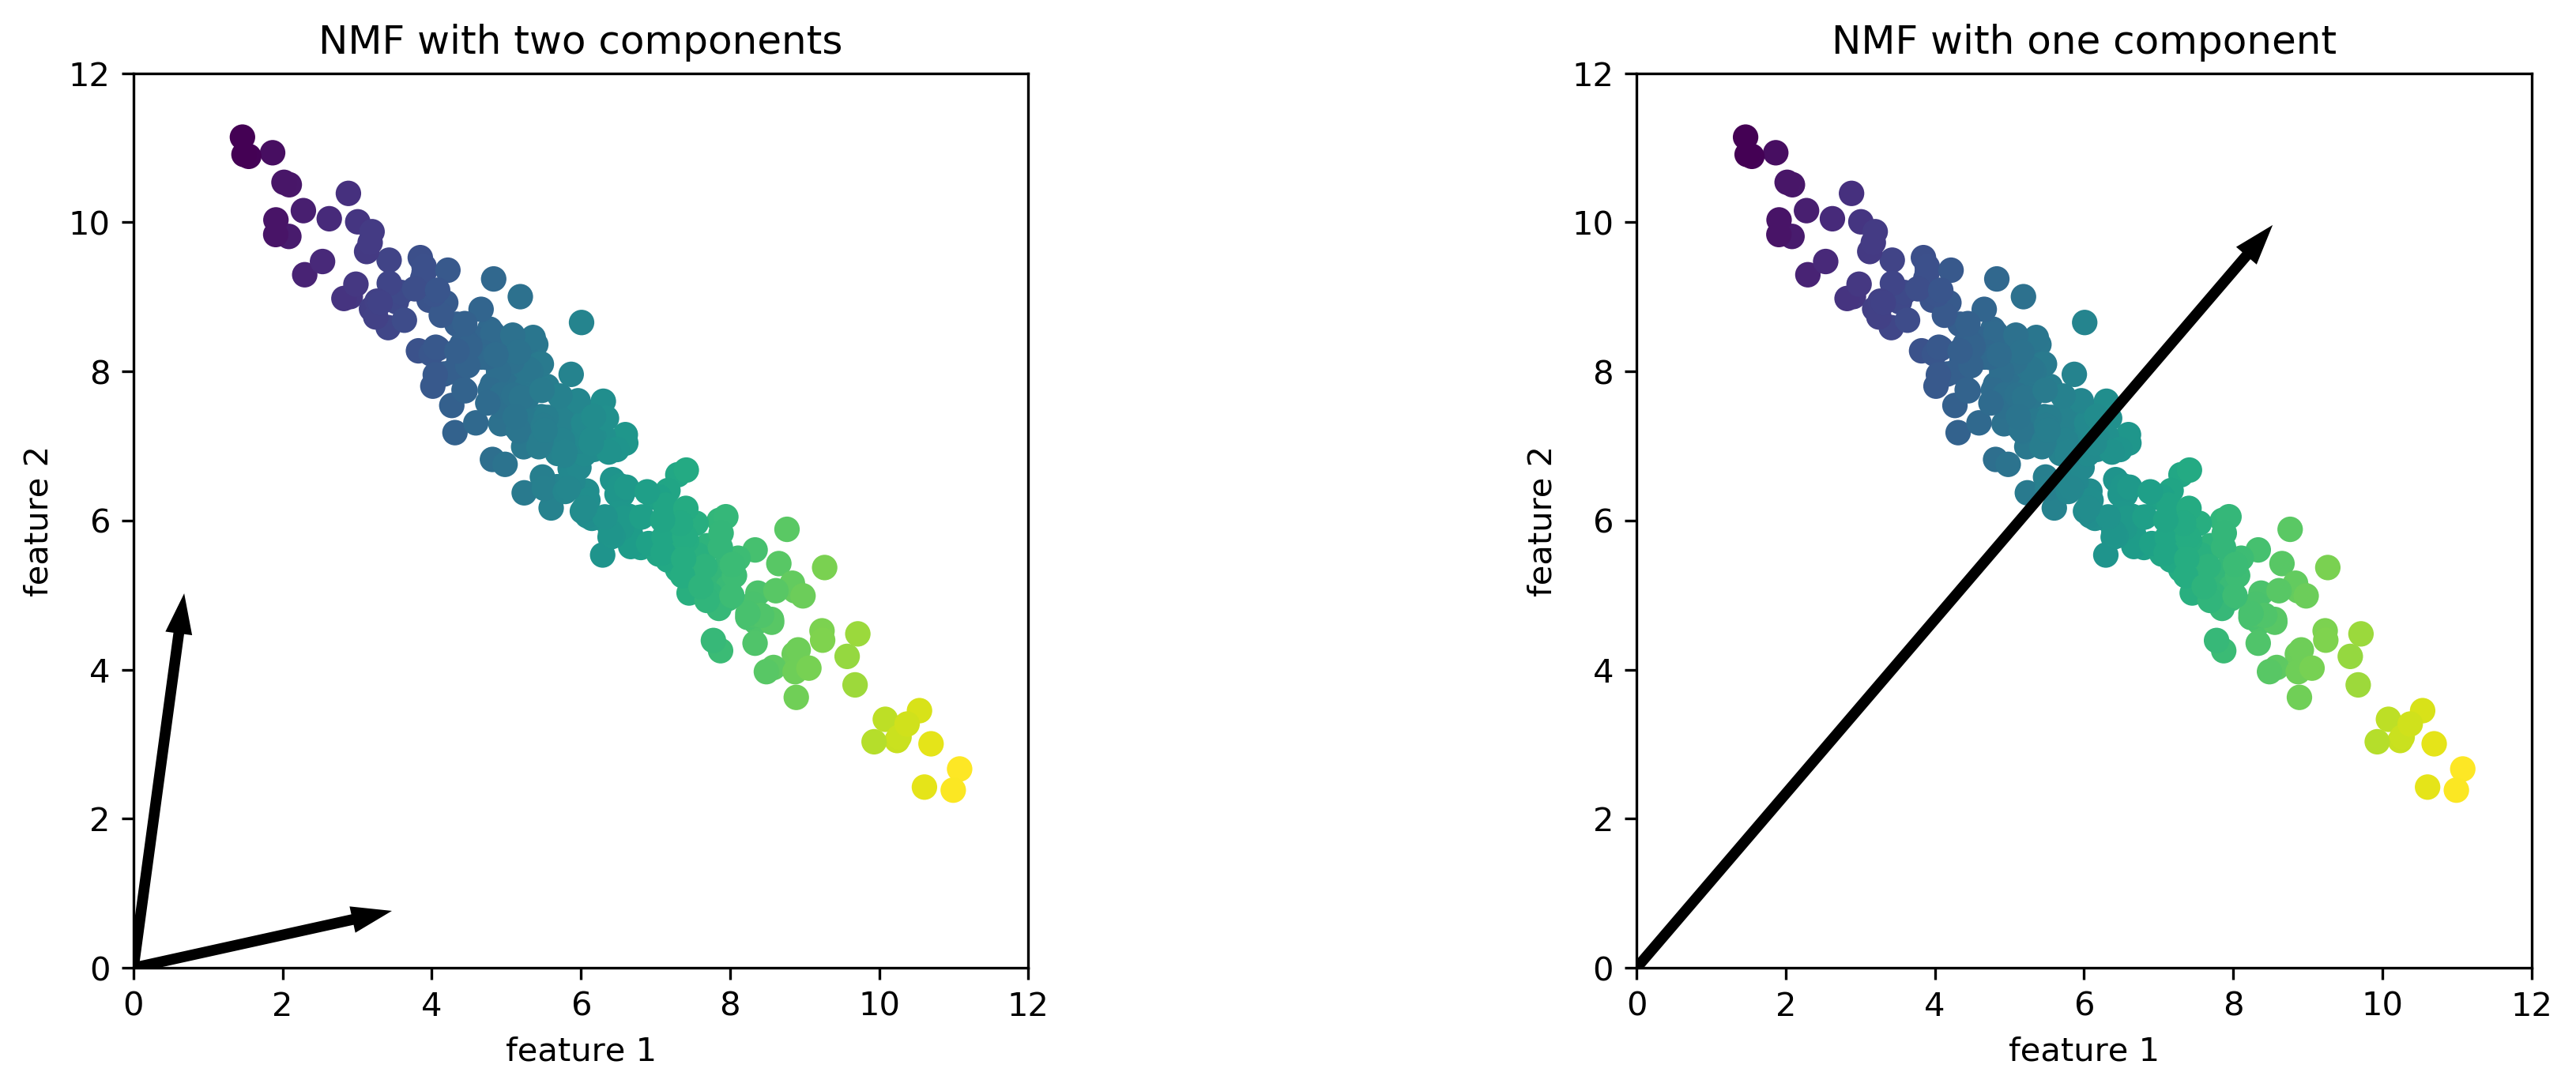

In [2]:
mglearn.plots.plot_nmf_illustration()

In [3]:
from sklearn.datasets import fetch_lfw_people
people = fetch_lfw_people(min_faces_per_person=20, resize=0.7)
image_shape = people.images[0].shape

print("people.images.shape: {}".format(people.images.shape))
print("An image shape: {}".format(people.images[0].shape))
print("Number of classes: {}".format(len(people.target_names)))
print()
print("people.data.shape: {}".format(people.data.shape))
print("people.target.shape: {}".format(people.target.shape))

people.images.shape: (2769, 87, 65)
An image shape: (87, 65)
Number of classes: 53

people.data.shape: (2769, 5655)
people.target.shape: (2769,)


In [4]:
print("people.target.shape:", people.target.shape)
print()
mask = np.zeros(people.target.shape, dtype=np.bool)

print("mask.shape:", mask.shape)
print()

print("np.unique(people.target):\n{0}".format(np.unique(people.target)))
print()

for target in np.unique(people.target):
    print("np.where(people.target == {0}):\n{1}".format(target, np.where(people.target == target)))
    mask[np.where(people.target == target)[0][:50]] = 1
    print()
    
X_people = people.data[mask]
y_people = people.target[mask]

# scale the grey-scale values to be between 0 and 1
# instead of 0 and 255 for better numeric stability:
X_people = X_people / 255.

people.target.shape: (2769,)

mask.shape: (2769,)

np.unique(people.target):
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52]

np.where(people.target == 0):
(array([  66,   90,  262,  684,  790,  848, 1019, 1050, 1068, 1147, 1265,
       1334, 1365, 1499, 1518, 1577, 1636, 1646, 1760, 1766, 1785, 1900,
       1919, 1949, 1954, 2002, 2013, 2051, 2169, 2235, 2300, 2324, 2405,
       2428, 2430, 2470, 2588, 2714, 2746]),)

np.where(people.target == 1):
(array([  68,  110,  148,  186,  191,  236,  244,  271,  409,  610,  622,
        668,  672,  676,  816,  945, 1106, 1271, 1290, 1299, 1448, 1510,
       1537, 1620, 2010, 2055, 2066, 2080, 2094, 2097, 2158, 2183, 2399,
       2417, 2682]),)

np.where(people.target == 2):
(array([ 128,  157,  272,  648,  761, 1144, 1168, 1242, 1567, 1614, 1774,
       1848, 1855, 1950, 2021, 2083, 2142, 2208, 2238, 2284, 2320]),)

np.where(peopl

In [5]:
from sklearn.neighbors import KNeighborsClassifier

# split the data in training and test set
# stratify parameter makes a split so that the proportion of values in the sample produced 
# will be the same as the proportion of values provided to parameter stratify.
X_train, X_test, y_train, y_test = train_test_split(X_people, y_people, stratify=y_people, random_state=0)
print(X_train.shape)
print(X_test.shape)
print(image_shape)

(1356, 5655)
(453, 5655)
(87, 65)


In [9]:
# FIXME hide this!
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
from sklearn.decomposition import PCA

pca = PCA(n_components=100, whiten=True, random_state=0).fit(X_train)
image_shape = people.images[0].shape
plt.figure(figsize=(20, 3))
ax = plt.gca()

imagebox = OffsetImage(people.images[0], zoom=7, cmap="gray")
ab = AnnotationBbox(imagebox, (.05, 0.4), pad=0.0, xycoords='data')
ax.add_artist(ab)

for i in range(4):
    imagebox = OffsetImage(pca.components_[i].reshape(image_shape), zoom=7,
                           cmap="viridis")

    ab = AnnotationBbox(imagebox, (.3 + .2 * i, 0.4),
                        pad=0.0,
                        xycoords='data'
                        )
    ax.add_artist(ab)
    if i == 0:
        plt.text(.18, .25, 'x_{} *'.format(i), fontdict={'fontsize': 50})
    else:
        plt.text(.15 + .2 * i, .25, '+ x_{} *'.format(i),
                 fontdict={'fontsize': 50})

plt.text(.95, .25, '+ ...', fontdict={'fontsize': 50})

plt.text(.13, .3, r'\approx', fontdict={'fontsize': 50})
plt.axis("off")
plt.savefig("../images/03-face_decomposition.png")
plt.close()

##### Applying NMF to face images

________________________________________________________________________________
[Memory] Calling mglearn.plot_nmf.nmf_faces...
nmf_faces(array([[0.529412, ..., 0.630065],
       ...,
       [0.197386, ..., 0.084967]], dtype=float32), 
array([[0.155556, ..., 0.328105],
       ...,
       [0.288889, ..., 0.972549]], dtype=float32))


In [ ]:
from sklearn.decomposition import NMF
nmf = NMF(n_components=15, random_state=0)
nmf.fit(X_train)
X_train_nmf = nmf.transform(X_train)
X_test_nmf = nmf.transform(X_test)

fig, axes = plt.subplots(3, 5, figsize=(15, 12), subplot_kw={'xticks': (), 'yticks': ()})
for i, (component, ax) in enumerate(zip(nmf.components_, axes.ravel())):
    ax.imshow(component.reshape(image_shape))
    ax.set_title("{}. component".format(i))

In [ ]:
compn = 3
# sort by 3rd component, plot first 10 images
inds = np.argsort(X_train_nmf[:, compn])[::-1]
fig, axes = plt.subplots(2, 5, figsize=(15, 8), subplot_kw={'xticks': (), 'yticks': ()})
fig.suptitle("Large component 3")
for i, (ind, ax) in enumerate(zip(inds, axes.ravel())):
    ax.imshow(X_train[ind].reshape(image_shape))

In [ ]:
compn = 7
# sort by 7th component, plot first 10 images
inds = np.argsort(X_train_nmf[:, compn])[::-1]
fig.suptitle("Large component 7")
fig, axes = plt.subplots(2, 5, figsize=(15, 8), subplot_kw={'xticks': (), 'yticks': ()})
for i, (ind, ax) in enumerate(zip(inds, axes.ravel())):
    ax.imshow(X_train[ind].reshape(image_shape))

In [ ]:
S = mglearn.datasets.make_signals()
print("Shape of S: {}".format(S.shape))
plt.figure(figsize=(6, 1))
plt.plot(S, '-')
plt.xlabel("Time")
plt.ylabel("Signal")

In [ ]:
# Mix data into a 100 dimensional state
A = np.random.RandomState(0).uniform(size=(100, 3))
X = np.dot(S, A.T)
print("Shape of measurements: {}".format(X.shape))
plt.figure(figsize=(6, 3))
plt.plot(X, '-')
plt.xlabel("Time")
plt.ylabel("Measurements")

In [ ]:
nmf = NMF(n_components=3, random_state=42)
S_ = nmf.fit_transform(X)
print("NMF - Recovered signal shape: {}".format(S_.shape))

In [ ]:
pca = PCA(n_components=3)
H = pca.fit_transform(X)
print("PCA - Recovered signal shape: {}".format(H.shape))

In [ ]:
models = [X, S, S_, H]
names = ['Observations (first three measurements)',
         'True sources',
         'NMF recovered signals',
         'PCA recovered signals']

fig, axes = plt.subplots(4, figsize=(8, 4), gridspec_kw={'hspace': .5}, subplot_kw={'xticks': (), 'yticks': ()})

for model, name, ax in zip(models, names, axes):
    ax.set_title(name)
    ax.plot(model[:, :3], '-')